In [11]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import sklearn modules for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
# Load the dataset
df = pd.read_csv("TSLA.csv")

# Display the first few rows to understand the data
print(df.head())


         Date   Open   High    Low  Close  Adj Close    Volume
0  2010-06-29  3.800  5.000  3.508  4.778      4.778  93831500
1  2010-06-30  5.158  6.084  4.660  4.766      4.766  85935500
2  2010-07-01  5.000  5.184  4.054  4.392      4.392  41094000
3  2010-07-02  4.600  4.620  3.742  3.840      3.840  25699000
4  2010-07-06  4.000  4.000  3.166  3.222      3.222  34334500


In [13]:
# Convert 'Date' to datetime format and extract numerical features
df['Date'] = pd.to_datetime(df['Date'])
df['DayOfYear'] = df['Date'].dt.dayofyear + (df['Date'].dt.year - df['Date'].dt.year.min()) * 365

# Set the feature (DayOfYear) and target (Close price)
X = df[['DayOfYear']]
y = df['Close']


In [14]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
# Initialize and train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions with Linear Regression
y_pred_linear = linear_model.predict(X_test)

# Calculate R-squared score for Linear Regression
r2_linear = r2_score(y_test, y_pred_linear)
print(f'Linear Regression R-squared Score: {r2_linear:.2f}')


Linear Regression R-squared Score: 0.41


In [16]:
# Initialize and train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions with Random Forest
y_pred_rf = rf_model.predict(X_test)

# Calculate R-squared score for Random Forest
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest R-squared Score: {r2_rf:.2f}')


Random Forest R-squared Score: 1.00


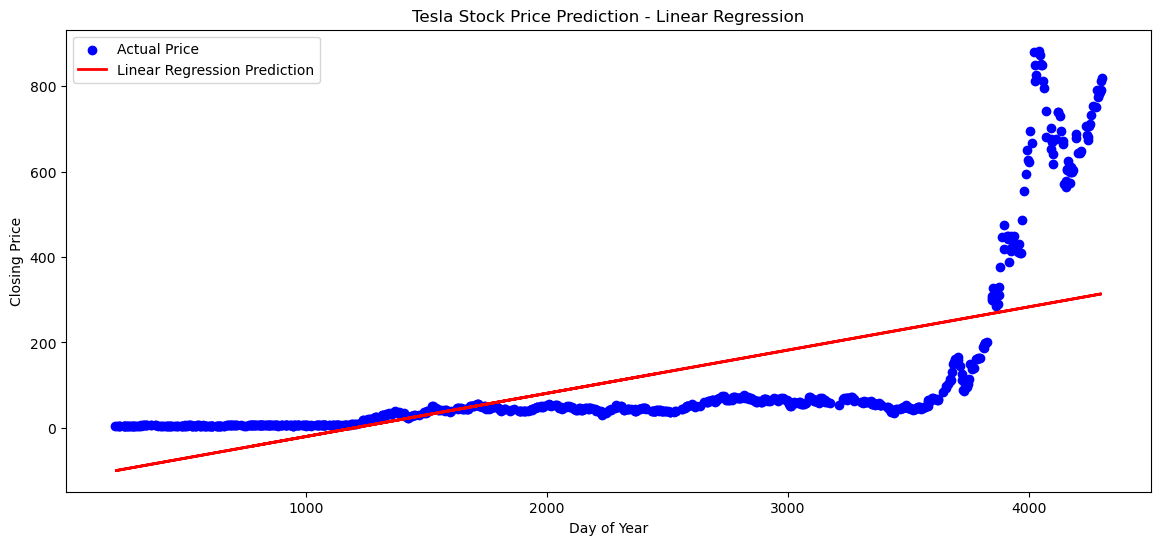

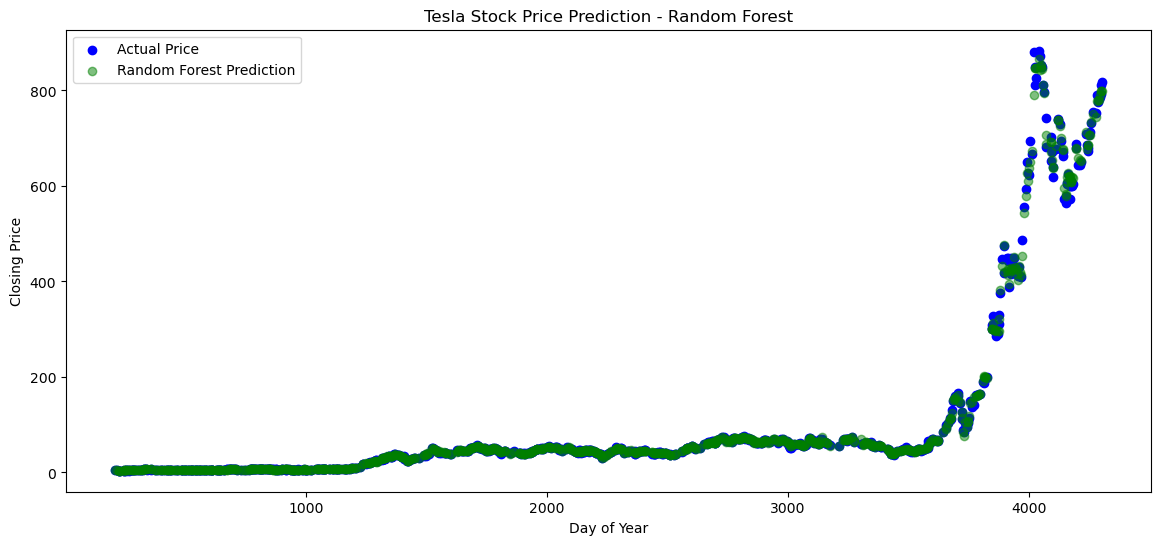

In [17]:
# Plotting Linear Regression Results
plt.figure(figsize=(14, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Price')
plt.plot(X_test, y_pred_linear, color='red', linewidth=2, label='Linear Regression Prediction')
plt.xlabel('Day of Year')
plt.ylabel('Closing Price')
plt.title('Tesla Stock Price Prediction - Linear Regression')
plt.legend()
plt.show()

# Plotting Random Forest Results
plt.figure(figsize=(14, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Price')
plt.scatter(X_test, y_pred_rf, color='green', alpha=0.5, label='Random Forest Prediction')
plt.xlabel('Day of Year')
plt.ylabel('Closing Price')
plt.title('Tesla Stock Price Prediction - Random Forest')
plt.legend()
plt.show()
